**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

# *Predicting genres for songs with machine learning methods* 

## Abstract

Music songs can be categorized into different genres. This classification progress can be automated with modern machine learning methods. In this study, principal component analysis was used to reduce dimensionality of data and logistic regression classifier was trained with music songs and their own genres. The aim was to predict labels (genres) for each song in test data. Scikit-learn library was used in analysis. As a result, model for prediction was composed with splitting training data into testing ($10$%) and training data ($90$%). Overall, accuracy for predicted labels was about $65$%. The model was validated with cross validation and the accuracy was compared with earlier research.

## 1. Introduction

In music business machine learning methods has become more important when it comes to understand different types of songs. This is used to categorize songs into different genres. Machine learning can be used for example in music recommendations and analysis of people's taste of music. There are many music genres and each of them has different properties, like rhythm, chroma and MFCCs [7]. In this study, the main goal is to predict genres for different songs with training data with known labels. Correctness of predicted labels is supposed to be as high as possible. This is important because results can be used in modern music technology to personalize customer's user experience.

Music genres are artificial concepts created by humans to categorize music [6]. According to previous studies, the accuracy of predicting genres is not very high because of many genres have properties in common and the classification is then difficult [5, 6]. For example, a pop song could have many same properties than a jazz or a rap song. In this study the aim is to clarify if it was to possible to predict these categories for songs with logistic regression.

## 2. Data analysis

Music song can be thought as a feature vector which contains three different patterns: `Rhythm`, `Chroma` and `MFCCs`. Data seems to include $N$ feature vectors $x$ ($N * d$) and each of them include $d=264$ dimensions. Each feature vector has corresponding label $y_n$. These labels are included in label vector $y$ ($N * 1$) which consists $N$ labels. The given training data consists of $N=4363$ songs and testing data consists of $N=6544$ songs.

Labels for music genres used in this paper are as follows:
1. `Pop_Rock`
2. `Electronic`
3. `Rap`
4. `Jazz`
5. `Latin`
6. `RnB`
7. `International`
8. `Country`
9. `Reggae`
10. `Blues`


In [1]:
# Import libraries
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# scikit-learn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

The given training data, training labels and test data are read into Python matrices.

In [2]:
# Load the data and cleanup

# training data
training_data = pd.read_csv("train_data.csv", header=None)
training_labels = pd.read_csv("train_labels.csv", header=None)

# test data
test_data = pd.read_csv("test_data.csv", header=None)

# data vectors into numpy matrices
training_data = training_data.values
training_labels = training_labels.values
test_data = test_data.values

# genres
genres = ['',
          'Pop_rock', 
         'Electronic', 
         'Rap',
         'Jazz',
         'Latin',
         'RnB',
         'International',
         'Country',
         'Reggae',
         'Blues']


As seen in histogram below, most of the songs in the training data belongs to genre 1: `Pop_Rock`. The second largest category seem to be 2: `Electronic`. As an expectation, most of predicted genres of test data songs would belong to genre 1.

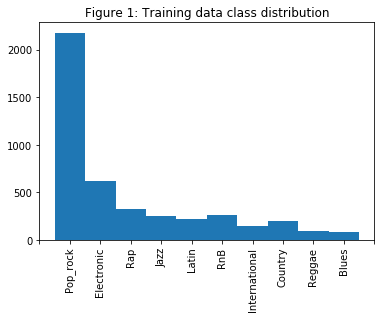

Training data sample size N= 4363
Test data sample size N = 6544
Data dimension d= 264


In [3]:
#Analysis of the input data
plt.hist(training_labels, bins = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5])
plt.xticks(np.arange(len(genres)+1),genres, rotation=90)
plt.title('Figure 1: Training data class distribution')
plt.show()

print("Training data sample size N=",len(training_data))
print("Test data sample size N =",len(test_data))
print("Data dimension d=",len(test_data[0]))

## 3. Methods and experiments

In this study the given training data is divided into two different parts: training data and test data. This new training data consists $90$% and test data $10$% of the original training data. In this progress training data is first fitted with `scikit-learn` methods [1]. This is used for standardize features [2]. First, the training data matrix is standardized with `scikit-learn` standard scaler. Principal component analysis `PCA` is conducted for training data to reduce dimensions. In `PCA`, $95$% of variance is retained [2]. After `PCA`, the classifier is trained with training data feature matrix and training labels. In this case, the classifying is conducted with logistic regression. Logistic regression was chosen, because it performed slightly better accuracy than support vector machine `SVM` or k-nearest neighbor `kNN` search classifiers (see appendices).

Block diagram of the progress:

_____________
`SPLIT TRAINING DATA` $\Rightarrow$ `FEATURE STANDARDIZATION` $\Rightarrow$ `PRINCIPAL COMPONENT ANALYSIS` $\Rightarrow$ `LOGISTIC REGRESSION TRAINING + CV` $\Rightarrow$ `LABEL PREDICTION`
_________

Cross validation was used to validate model. CV method with 10 iterations gives accuracy $0.64 (\pm 0.04)$ which is not very high, but still more than $50$%.

In [5]:
# WARNING: running this cell takes a while


# split training data into train (90%) and test data (10%)
X_train, X_test, y_train, y_test = train_test_split(training_data, training_labels, random_state=0, test_size = 0.1)

# feature standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# PCA
# choose the minimum number of pc components
# retain 95% of variance
pca = PCA(0.95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# Logistic regression training with training data
logisticRegr = LogisticRegressionCV(cv=5, random_state=0,multi_class='multinomial')
logisticRegr.fit(X_train, y_train)

# Predict labels
logisticRegr.predict(X_test[0].reshape(1,-1))
y_hat = logisticRegr.predict(X_test)
y_prob = logisticRegr.predict_proba(X_test)

# Cross validation
from sklearn.model_selection import cross_val_score

score = cross_val_score(logisticRegr, X_train, y_train, cv=10,scoring='accuracy')

print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of

Accuracy: 0.65 (+/- 0.04)


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Next, do the same with the original training data for Kaggle competition: 

In [7]:
# WARNING: running this cell takes a while

# original test data prediction for Kaggle competition

# feature standardization
scaler = StandardScaler()

scaler.fit(training_data)

training_data = scaler.transform(training_data)
test_data = scaler.transform(test_data)

# PCA
# choose the minimum number of pc components
# retain 95% of variance
pca = PCA(0.95)
pca.fit(training_data)


training_data = pca.transform(training_data)
test_data = pca.transform(test_data)

# Logistic regression
logisticRegr = LogisticRegressionCV(cv=5, random_state=0,multi_class='multinomial')
logisticRegr.fit(training_data, training_labels)

# Predict labels
logisticRegr.predict(test_data[0].reshape(1,-1))
y_hat = logisticRegr.predict(test_data)
y_prob = logisticRegr.predict_proba(test_data)
y_hat.reshape(1,6544)


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of

array([[3, 9, 1, ..., 1, 3, 1]])

Histogram of predicted labels:

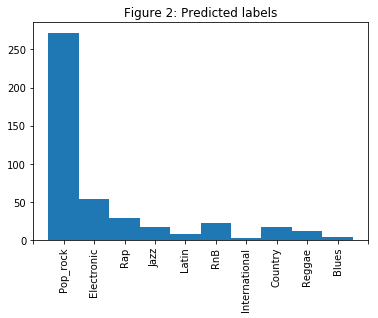

In [25]:
plt.hist(y_hat, bins = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5])
plt.xticks(np.arange(len(genres)+1),genres, rotation=90)
plt.title('Figure 2: Predicted labels')
plt.show()


## 4. Results

After splitting training data into two parts: new training data ($90$%) and test data ($10$%) the accuracy seems to be $64$% (compared to `SVM` $63$% and `KNN` $55$%, see appendices). Log-loss value for this situation is about $1.24$. In Kaggle competition the accuracy for given test data is about $65$% which is slightly better than the accuracy for splitted training data. In Kaggle, the log-loss value is about $0.17309$ which is considerably better than the model's above. The reason for this is unknown, but it might depends on the size of testing data sample.
![](./conf_mat.png)
Figure 3: Confusion matrix (plot composed with methods in [4]).

Figure 3 shows that predictions are distributed fairly evenly. For example, most of the predicted labels are similar to true labels but there is still some false labels. It is significant to notice that labels with low amount of songs has quite great probability to be classified with other labels. For example, `Blues`, `Latin` and `Country` are predicted to be `Pop_rock`. As a result, this classification method works best for `Pop_rock` genre because it has the major in the amount of songs.

In [8]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_hat)
print(conf_matrix)

#model accuracy
accuracy = logisticRegr.score(X_test, y_test)
print("Model accuracy: ",accuracy)

#log-loss performance
from sklearn.metrics import log_loss
logloss = log_loss(y_test, y_prob)
print("Log loss: ", logloss)

[[192   7   0   1   0   7   0   5   0   0]
 [ 13  36   2   2   0   1   0   0   3   0]
 [  1   1  22   0   0   0   0   0   3   0]
 [  5   2   0  10   1   0   0   1   0   1]
 [ 17   3   0   0   3   5   1   1   1   1]
 [ 10   2   4   3   0   8   0   0   1   0]
 [  4   1   0   0   3   1   2   0   0   1]
 [ 19   0   1   0   1   0   0   9   0   0]
 [  2   1   0   0   0   0   0   0   4   0]
 [  9   0   0   1   0   0   0   1   0   1]]
Model accuracy:  0.656750572082
Log loss:  1.14094153683


The two cell below are used to save results into a csv file for the Kaggle competition.

In [4]:
#save predicted labels into csv-file
id = np.arange(1,6545)
np.savetxt('group642_accuracy.csv', [p for p in zip(id, y_hat)], delimiter=',', fmt='%d',header="Sample_id,Sample_label", comments='')


In [ ]:

import csv
y_prob.tolist()

header= ["Sample_id","Class_1","Class_2","Class_3","Class_4","Class_5","Class_6","Class_7","Class_8","Class_9","Class_10"]
with open('group642_logloss.csv', 'w') as csvFile:
    writer= csv.writer(csvFile)
    writer.writerow(header)
    for i in range(y_prob.shape[0]):
        writer.writerow([i+1,y_prob[i,0],y_prob[i,1],y_prob[i,2],y_prob[i,3],y_prob[i,4],y_prob[i,5],y_prob[i,6],y_prob[i,7],y_prob[i,8],y_prob[i,9]])
csvFile.close()


## 5. Discussion/Conclusions

In this study, machine learning methods were used to predict genres for different kinds of songs. There were 10 different labels (or genres) and thousands of songs to be classified. First training data was splitted into two parts: train and test data and then principal component analysis was used to reduce dimensionality of data. After this procedure, the logistic regression classifier was trained with splitted data and labels were predicted for test data. Cross validation method gave score for the accuracy of the model. Results were studied with confusion matrix which showed that categories with smaller amount of songs were mispredicted with high probability.

Accuracy shows a quite well the percentage of right labeled songs. It also points out how unaccurate this classification method is overall. For example, the good accuracy would be over $80$% but in this study only $65$% is achieved. Log-loss is significant when comparing different label probabilities. Somehow it doesn't work in this study very well if the training data is divided into two parts. In Kaggle the log-loss gives better score which might means that logistic regression classifier classifies given test data better than divided training data.

Previously, Tzanetakis & Cook (2002) have conducted machine learning classification with different methods. They got accuracy of about $61$% for non-real time which is almost same than $64-65$% accuracy of this study. This study demonstrated that predicting categories for songs with machine learning methods like logistic regression is possible. However, accuracy could be better and some improvements need to be done in future research. In the future this kind of studies should take in advance the properties of feature vector patterns better. The statistics could be used in data cleansing and this might give better predictions for labels afterwards.



## 6. References

[1] Towards Data Science: PCA using Python scikit-learn. URL: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60 [Visited: 22.10.2018].

[2] Scikit-learn: StandardScaler. URL: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html [Visited: 22.10.2018].

[3] Geeks for geeks: Multiclass classification using scikit-learn, URL: https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/  [Visited: 31.10.2018].

[4] Scikit-learn: Plot confusion matrix. URL: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html [Visited: 31.10.2018].

[5] Nasridinov, Aziz & Park, Young-Ho, "Music genre classification with machine learning techniques
", International Journal of Multimedia and Ubiquitous Engineering, Volume 9, Issue 4, 2014, Pages 31-42, DOI: 10.14257/ijmue.2014.9.4.04

[6] Tzanetakis, George & Cook, Perry, "Musical Genre Classification of Audio Signals", IEEE Transactions on Speech and Audio Processing, vol. 10, no. 5, 2002

[7] MLBP 2018 Data Analysis Project description, URL: https://mycourses.aalto.fi/pluginfile.php/743413/mod_resource/content/14/MLBP%202018%20project%20description.pdf

## Appendix

`SVM` and `KNN` classifiers mentioned in `section 3`:

In [7]:
# WARNING: Takes a while for running.
# Other classifiers used in study but rejected.

# SVM (support vector machine classifier)
from sklearn.svm import SVC 
svm = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm.predict(X_test) 
  
# calculate accuracy for svm 
svm_accuracy = svm.score(X_test, y_test) 
print("Accuracy for svm method: ", svm_accuracy)

# KNN (k-nearest-neighbor classifier)
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train) 
  
# accuracy on X_test 
knn_accuracy = knn.score(X_test, y_test) 
print("Accuracy for kNN method: ", knn_accuracy)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy for svm method:  0.633867276888


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


Accuracy for kNN method:  0.546910755149
